In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [5]:
DATA_PATH = "data.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    

    print("Data succesfully loaded!")

    return  X, y

In [6]:
def plot_history(h):
    plt.subplot(1,2,1)
    plt.title('Train Accuracy')
    plt.plot(h.history['accuracy'])
    plt.subplot(1,2,2)
    plt.title('Test Accuracy')
    plt.plot(h.history['val_accuracy'])
    plt.show()
    
    plt.title('comparision of train and test accuracy')
    
    plt.plot(h.history['accuracy'],label='train ')
    plt.plot(h.history['val_accuracy'],label='test')
    plt.legend()
    plt.show()
    
    plt.subplot(1,2,1)
    plt.title('Train Error')
    plt.plot(h.history['loss'])
    plt.subplot(1,2,2)
    plt.title('Test Error')
    plt.plot(h.history['val_loss'])
    plt.show()
    
    plt.title('comparision of train and test error')
    
    plt.plot(h.history['loss'],label='train ')
    plt.plot(h.history['val_loss'],label='test')
    plt.legend(loc='upper right')
    plt.show()

Now we want to split our data in 3 parts train, test, validation. we keep test data completely seprate so that modal has never seen it before . In this way we can analyze the perforance of our modal.

In [7]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets because CNN need 3d data shape with some depth
    X_train = X_train[..., np.newaxis] # it will have 4d (num of samples,130,13,1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [8]:
#bulid CNN
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(4, activation='softmax'))

    return model

In [9]:
if __name__ == "__main__":
    # create train test validation 0.25 is percent out of total dataset set=1 (25% of dataset) for test set and .2 is percent out of training set (20 % of training set) we will used for validation
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)
    

    
    

Data succesfully loaded!


In [10]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

In [11]:
 # train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
75/75 [==============================] - 8s 88ms/step - loss: 1.5586 - accuracy: 0.3967 - val_loss: 1.3794 - val_accuracy: 0.4183
Epoch 2/30
75/75 [==============================] - 5s 70ms/step - loss: 0.9592 - accuracy: 0.5861 - val_loss: 0.9623 - val_accuracy: 0.5933
Epoch 3/30
75/75 [==============================] - 6s 78ms/step - loss: 0.7249 - accuracy: 0.6946 - val_loss: 0.6965 - val_accuracy: 0.7267
Epoch 4/30
75/75 [==============================] - 5s 71ms/step - loss: 0.6372 - accuracy: 0.7297 - val_loss: 0.5894 - val_accuracy: 0.7583
Epoch 5/30
75/75 [==============================] - 5s 72ms/step - loss: 0.5591 - accuracy: 0.7730 - val_loss: 0.5391 - val_accuracy: 0.7700
Epoch 6/30
75/75 [==============================] - 5s 73ms/step - loss: 0.5162 - accuracy: 0.7835 - val_loss: 0.5081 - val_accuracy: 0.7750
Epoch 7/30
75/75 [==============================] - 5s 71ms/step - loss: 0.4832 - accuracy: 0.7960 - val_loss: 0.4840 - val_accuracy: 0.7983
Epoch 8/30
75

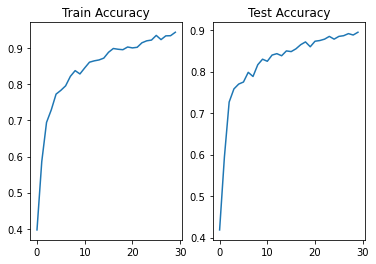

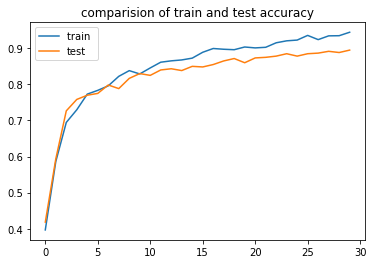

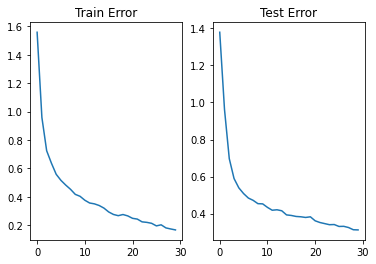

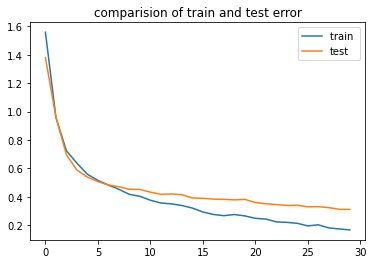

In [12]:
  # plot accuracy/error for training and validation
plot_history(history)

In [13]:
# evaluate model on test set which modal has not seen before
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

32/32 - 1s - loss: 0.2620 - accuracy: 0.9110 - 616ms/epoch - 19ms/step

Test accuracy: 0.9110000133514404


In [41]:
# pick a sample to predict from the test set
X_to_predict = X_test[2]
y_to_predict = y_test[2]

In [37]:
def predict(model, X, y,genre_names):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(genre_names[y], genre_names[predicted_index]))

In [ ]:
with open('data.json', "r") as fp:
        data = json.load(fp)
map=np.array(data["mapping"])

In [39]:
# print(X_test,y_test)


genre_names = np.array([l.split('\\')[1] for l in map])
print(genre_names)

['blues' 'classical' 'country' 'hiphop']


In [42]:
 # predict sample
predict(model, X_to_predict, y_to_predict,genre_names)



1/1 [==============================] - 0s 32ms/step
Target: classical, Predicted label: ['classical']


In [45]:
for i in range(10):
    X_to_predict = X_test[i]
    y_to_predict = y_test[i]
    predict(model, X_to_predict, y_to_predict,genre_names)
    
    

1/1 [==============================] - 0s 32ms/step
Target: hiphop, Predicted label: ['hiphop']
1/1 [==============================] - 0s 48ms/step
Target: hiphop, Predicted label: ['hiphop']
1/1 [==============================] - 0s 50ms/step
Target: classical, Predicted label: ['classical']
1/1 [==============================] - 0s 40ms/step
Target: blues, Predicted label: ['blues']
1/1 [==============================] - 0s 40ms/step
Target: country, Predicted label: ['country']
1/1 [==============================] - 0s 32ms/step
Target: hiphop, Predicted label: ['hiphop']
1/1 [==============================] - 0s 40ms/step
Target: hiphop, Predicted label: ['hiphop']
1/1 [==============================] - 0s 61ms/step
Target: blues, Predicted label: ['classical']
1/1 [==============================] - 0s 88ms/step
Target: blues, Predicted label: ['blues']
1/1 [==============================] - 0s 84ms/step
Target: blues, Predicted label: ['blues']
